# Importing Libraries

In [1]:
# Basics libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# importing hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [8]:
data = pd.read_excel("World_development_mesurement.xlsx")
pd.set_option('display.max_columns',None)

In [9]:
data['Days to Start Business'].notna()

0       False
1       False
2       False
3       False
4       False
        ...  
2699    False
2700     True
2701     True
2702     True
2703    False
Name: Days to Start Business, Length: 2704, dtype: bool

In [10]:
data.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",175.0,0.006,0.8,0.033,81.0,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",310.0,0.010,0.5,0.112,80.0,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,792.0,0.013,0.5,0.164,78.0,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,83.0,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


In [11]:
df = data.copy()
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


# inbound tourism means visits to a country by visitors who are not residents of that country. 
# outbound tourism means visits by residents of a country outside that count

# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [13]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [14]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [15]:
df['Country'].value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

# 208 Countries with each having 13 entries

In [16]:
df[df['Country'] == 'United Kingdom']

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
134,0.012,NaN,543662.0,United Kingdom,NaN,NaN,222940.0,"$1,493,628,385,535",0.070,"$1,761",NaN,0.006,0.3,0.060,80.0,75.0,0.7,1,0.190,0.652,0.158,58892514,0.787,"$29,978,000,000","$47,009,000,000"
342,0.011,NaN,550552.0,United Kingdom,NaN,NaN,223770.0,"$1,485,147,545,703",0.073,"$1,819",NaN,0.006,0.3,0.051,80.0,76.0,0.8,1,0.188,0.654,0.158,59119673,0.788,"$26,137,000,000","$46,410,000,000"
550,0.011,NaN,531939.0,United Kingdom,NaN,NaN,218306.0,"$1,620,900,779,377",0.076,"$2,065",NaN,0.005,0.6,0.040,81.0,76.0,0.8,1,0.186,0.656,0.158,59370479,0.790,"$27,819,000,000","$51,125,000,000"
758,0.012,NaN,540640.0,United Kingdom,13.0,NaN,222080.0,"$1,875,141,224,490",0.078,"$2,444",NaN,0.005,0.6,0.037,81.0,76.0,0.9,1,0.183,0.658,0.159,59647577,0.793,"$30,736,000,000","$58,627,000,000"
966,0.012,NaN,540409.0,United Kingdom,13.0,NaN,221558.0,"$2,220,820,974,770",0.080,"$2,955",NaN,0.005,0.7,0.044,81.0,77.0,1.0,1,0.181,0.660,0.159,59987905,0.796,"$37,166,000,000","$69,076,000,000"
1174,0.012,34.7%,541986.0,United Kingdom,13.0,NaN,222638.0,"$2,321,357,943,509",0.083,"$3,161",105.0,0.005,0.7,0.046,81.0,77.0,1.1,1,0.179,0.661,0.160,60401206,0.799,"$39,411,000,000","$72,993,000,000"
1382,0.012,34.6%,542041.0,United Kingdom,13.0,NaN,218961.0,"$2,483,010,316,107",0.084,"$3,423",105.0,0.005,0.7,0.046,81.0,77.0,1.2,1,0.178,0.662,0.160,60846820,0.802,"$43,803,000,000","$77,674,000,000"
1590,0.013,34.5%,528906.0,United Kingdom,13.0,NaN,210993.0,"$2,857,082,734,449",0.085,"$3,953",105.0,0.005,0.8,0.055,82.0,77.0,1.2,1,0.177,0.662,0.161,61322463,0.805,"$48,193,000,000","$86,747,000,000"
1798,0.013,34.2%,522467.0,United Kingdom,13.0,NaN,208209.0,"$2,687,795,428,485",0.090,"$3,875",105.0,0.005,0.8,0.046,82.0,78.0,1.2,1,0.176,0.661,0.162,61806995,0.808,"$46,285,000,000","$83,584,000,000"
2006,0.013,34.9%,475108.0,United Kingdom,12.0,NaN,196485.0,"$2,208,001,972,524",0.099,"$3,512",110.0,0.005,0.8,0.006,82.0,78.0,1.2,1,0.176,0.660,0.164,62276270,0.810,"$38,564,000,000","$61,133,000,000"


#### What are in those 13 entries ?

Records for 13 years from 2000 - 2013

https://data.worldbank.org/indicator/FR.INR.LEND?locations=GB

In [17]:
df[df['Country'] == 'Virgin Islands (U.S.)']

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
207,0.014,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,80.0,73.0,0.3,1,0.259,0.655,0.086,108639,0.926,"$1,206,000,000",NaN
415,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,81.0,75.0,0.4,1,0.253,0.658,0.089,108386,0.928,"$1,234,000,000",NaN
623,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,81.0,75.0,0.4,1,0.246,0.662,0.093,108208,0.930,"$1,195,000,000",NaN
831,0.014,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,81.0,75.0,0.5,1,0.238,0.666,0.096,108085,0.933,"$1,257,000,000",NaN
1039,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,0.6,1,0.231,0.669,0.101,107950,0.935,"$1,356,000,000",NaN
1247,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,0.7,1,0.224,0.670,0.106,107863,0.937,"$1,432,000,000",NaN
1455,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.219,0.670,0.111,107700,0.939,"$1,467,000,000",NaN
1663,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.214,0.669,0.117,107423,0.941,"$1,512,000,000",NaN
1871,0.012,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.211,0.666,0.123,107091,0.942,"$1,157,000,000",NaN
2079,0.012,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.208,0.662,0.130,106707,0.944,"$1,021,000,000",NaN


In [18]:
df[df['Country'] == 'Virgin Islands (U.S.)']

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
207,0.014,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,80.0,73.0,0.3,1,0.259,0.655,0.086,108639,0.926,"$1,206,000,000",NaN
415,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,81.0,75.0,0.4,1,0.253,0.658,0.089,108386,0.928,"$1,234,000,000",NaN
623,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,81.0,75.0,0.4,1,0.246,0.662,0.093,108208,0.930,"$1,195,000,000",NaN
831,0.014,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,81.0,75.0,0.5,1,0.238,0.666,0.096,108085,0.933,"$1,257,000,000",NaN
1039,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,0.6,1,0.231,0.669,0.101,107950,0.935,"$1,356,000,000",NaN
1247,0.015,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,0.7,1,0.224,0.670,0.106,107863,0.937,"$1,432,000,000",NaN
1455,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.219,0.670,0.111,107700,0.939,"$1,467,000,000",NaN
1663,0.013,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.214,0.669,0.117,107423,0.941,"$1,512,000,000",NaN
1871,0.012,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.211,0.666,0.123,107091,0.942,"$1,157,000,000",NaN
2079,0.012,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,82.0,76.0,NaN,1,0.208,0.662,0.130,106707,0.944,"$1,021,000,000",NaN


In [19]:
df.shape

(2704, 25)

In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [22]:
df.isnull().sum().sum()

11740

1.) There are 11740 overall null values in our Dataset.

2.) There are No Duplicate values in our Dataset.

3.) Columns - Country ; Number of Records and Population Total are the only columns with 0 null values.

# Dealing with null values


#### When we have such a large number of missing values present in our data, we have 2 options.

1) Deletion : Deletion of rows (if you have large volume of data)
              
              Deletion of columns (if > 45% of data is null)

2) Imputation : for numeric column -- use mean/median/mode
                
                for categorical columns -- use mode or ration

1.) Deletion : Deletion of rows (if you have large volume of data)¶
          Deletion of columns (if > 45% of data is null)

In [25]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Ease of Business,2519,93.158284
Hours to do Tax,1288,47.633136
Business Tax Rate,1281,47.374260
Days to Start Business,986,36.464497
Energy Usage,919,33.986686
Lending Interest,824,30.473373
CO2 Emissions,579,21.412722
Tourism Outbound,471,17.418639
Tourism Inbound,368,13.609467
Health Exp % GDP,309,11.427515


#### Dropping columns which have null values more than 45 %

In [26]:
# we will delete columns having more than 45% entries as null
list = []
for col in df.columns:
    if df[col].isna().sum() > df.shape[0] * 0.45 :
        list.append(col)
list 

['Business Tax Rate', 'Ease of Business', 'Hours to do Tax']

#### Number of Records -> Dropping columns not having any contribution towards Clustering.

In [27]:
column_to_drop = df[['Ease of Business','Hours to do Tax','Business Tax Rate','Number of Records']]

In [28]:
column_to_drop.head()

,Ease of Business,Hours to do Tax,Business Tax Rate,Number of Records
0,NaN,NaN,NaN,1
1,NaN,NaN,NaN,1
2,NaN,NaN,NaN,1
3,NaN,NaN,NaN,1
4,NaN,NaN,NaN,1


In [29]:
df = df.drop(column_to_drop,axis=1)

In [30]:
df.shape

(2704, 21)

In [31]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Days to Start Business,986,36.464497
Energy Usage,919,33.986686
Lending Interest,824,30.473373
CO2 Emissions,579,21.412722
Tourism Outbound,471,17.418639
Tourism Inbound,368,13.609467
Health Exp % GDP,309,11.427515
Health Exp/Capita,309,11.427515
Infant Mortality Rate,260,9.615385
Population 0-14,220,8.136095


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   Days to Start Business  1718 non-null   float64
 4   Energy Usage            1785 non-null   float64
 5   GDP                     2494 non-null   object 
 6   Health Exp % GDP        2395 non-null   float64
 7   Health Exp/Capita       2395 non-null   object 
 8   Infant Mortality Rate   2444 non-null   float64
 9   Internet Usage          2531 non-null   float64
 10  Lending Interest        1880 non-null   float64
 11  Life Expectancy Female  2568 non-null   float64
 12  Life Expectancy Male    2568 non-null   float64
 13  Mobile Phone Usage      2537 non-null   float64
 14  Population 0-14         2484 non-null   

#### Identify categorical and numerical columns

In [33]:
categorical_cols = []
numerical_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [34]:
print('Categorical columns:', categorical_cols)

Categorical columns: ['Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']


> GDP , Health Exp/Capita , Tourism Inbound , Tourism Outbound These Column are not Categorical They are Numerical By nature coz Numbers are involved in it, so lets convert them to numeric form by doing some string operation.

In [35]:
# removing $ sign which gives these columns non numeric appearance
df['GDP'] = df['GDP'].str.replace('$', '')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$', '')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace('$', '') 
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace('$', '')

In [36]:
# removing , sign which gives these columns non numeric appearance & type casting
df['GDP'] = df['GDP'].str.replace(',', '').astype('Int64') 
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',', '').astype('Int64')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace(',', '').astype('Int64')
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace(',', '').astype('Int64')

In [37]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('categorical_features:', categorical_features)  

# 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound' converted into int

categorical_features: ['Country']


In [38]:
print('Numerical columns:', numerical_cols)

Numerical columns: ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'Health Exp % GDP', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban']


#### Under numeric features there are 2 types of features ie. discrete and categorical

In [39]:
discrete_features = [feature for feature in numerical_cols if len(df[feature].unique())<25]
print('discrete features:', discrete_features, '\n')

discrete features: ['Internet Usage'] 



In [40]:
continuous_features = [feature for feature in numerical_cols if feature not in discrete_features]
print('continuous features:', continuous_features, '\n') 

continuous features: ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'Health Exp % GDP', 'Infant Mortality Rate', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban'] 



#### Clustering is based on Countries so lets analyse Country Columns

In [42]:
for country in df.Country.unique():
    df_country_name = df[df['Country'] ==country]

    for i in range(0,21):
        if df_country_name.isna().sum()[i] == df_country_name.shape[0]  :
            print(country, '----{column no:}', i+1) 
            
# Eritrea has column No. 11 and 12 are totally null

Benin ----{column no:} 11
Burkina Faso ----{column no:} 5
Burkina Faso ----{column no:} 11
Burundi ----{column no:} 5
Central African Republic ----{column no:} 5
Chad ----{column no:} 5
Cote d'Ivoire ----{column no:} 11
Eritrea ----{column no:} 11
Eritrea ----{column no:} 21
Ghana ----{column no:} 11
Guinea ----{column no:} 5
Guinea-Bissau ----{column no:} 11
Liberia ----{column no:} 5
Madagascar ----{column no:} 5
Malawi ----{column no:} 5
Mali ----{column no:} 5
Mali ----{column no:} 11
Mauritania ----{column no:} 5
Mauritania ----{column no:} 20
Mauritania ----{column no:} 21
Niger ----{column no:} 5
Niger ----{column no:} 11
Rwanda ----{column no:} 5
Senegal ----{column no:} 11
Sierra Leone ----{column no:} 5
Somalia ----{column no:} 4
Somalia ----{column no:} 5
Somalia ----{column no:} 6
Somalia ----{column no:} 7
Somalia ----{column no:} 8
Somalia ----{column no:} 11
Somalia ----{column no:} 20
Somalia ----{column no:} 21
South Sudan ----{column no:} 2
South Sudan ----{column no:

In [43]:
list = []
for country in df.Country.unique():
    df_country_name = df[df['Country'] ==country]

    for i in range(0,21):
        if df_country_name.isna().sum()[i] == df_country_name.shape[0]  :
            list.append(country)

In [44]:
null_col_country = pd.DataFrame() 
null_col_country['Country'] = list 

null_col_country['Country'].value_counts()  

#Turks and Caicos Islands  has 16 out of 21 columns totally null

American Samoa               16
Turks and Caicos Islands     16
St. Martin (French part)     16
Isle of Man                  14
Sint Maarten (Dutch part)    13
                             ..
Luxembourg                    1
Senegal                       1
Portugal                      1
Rwanda                        1
Benin                         1
Name: Country, Length: 69, dtype: int64

We observe that entries for big countries are properly maintained where the most of the null entries are associated with small countries like Turks and Caicos Islands , Virgin Islands (U.S) , Marshall Islands¶
American Samoa - 45,035 Population (https://www.worlddata.info/oceania/american-samoa/index.php#:~:text=The%20dwarf%20state%20has%20a,area%20and%20ranked%20219th%20worldwide)

Turks and Caicos Islands - 44,542 Population (https://en.wikipedia.org/wiki/Turks_and_Caicos_Islands)

St. Martin (French part) - 73,777 Population (https://en.wikipedia.org/wiki/Saint_Martin_(island))

Hence, from the above observe we can see that there are Columns in our datasets with with no values, So Deleting Records of those countries having more than 1/4th columns totally blank.

In [45]:
df.head()

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,NaN,26998.0,54790058957,0.035,60,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,9542.0,Angola,NaN,7499.0,9129594819,0.034,22,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,1617.0,Benin,NaN,1983.0,2359122303,0.043,15,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,4276.0,Botswana,NaN,1836.0,5788311645,0.047,152,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,1041.0,Burkina Faso,NaN,NaN,2610959139,0.051,12,0.096,0.0,NaN,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000,30000000


In [46]:
#deleting countries having more than 1/4th rows totally blank
list = []
for i in range (0,len(null_col_country['Country'].value_counts())):
    if null_col_country['Country'].value_counts()[i] >= 6:
        list.append(null_col_country['Country'].value_counts().index[i])
        
list 
#these are countries having more than 6 columns as totally blank
#deleting all these contries

['American Samoa',
 'Turks and Caicos Islands',
 'St. Martin (French part)',
 'Isle of Man',
 'Sint Maarten (Dutch part)',
 'Cayman Islands',
 'Liechtenstein',
 'Monaco',
 'Greenland',
 'Faeroe Islands',
 'Guam',
 'Andorra',
 'Kosovo',
 'Virgin Islands (U.S.)',
 'Bermuda',
 'Curacao',
 'Korea, Dem. Rep.',
 'Somalia',
 'San Marino',
 'French Polynesia',
 'New Caledonia',
 'South Sudan',
 'Puerto Rico']

In [47]:
null_col_country.value_counts().sum()

313

In [48]:
# This are the index Number of those columns which have to removed.
list1 = []

for i in range(0, len(df)):
    for j in range (0,len(list)):
        if df['Country'][i] == list[j]:
            list1.append(i) 

In [49]:
df.drop(list1,inplace = True)

In [50]:
df.shape

(2405, 21)

#### -> 299 rows were removed 

In [51]:
df = df.reset_index()

In [52]:
df.head()

,index,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0,0.020,87931.0,Algeria,NaN,26998.0,54790058957,0.035,60,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,1,0.050,9542.0,Angola,NaN,7499.0,9129594819,0.034,22,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,2,0.043,1617.0,Benin,NaN,1983.0,2359122303,0.043,15,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,3,0.027,4276.0,Botswana,NaN,1836.0,5788311645,0.047,152,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,4,0.046,1041.0,Burkina Faso,NaN,NaN,2610959139,0.051,12,0.096,0.0,NaN,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000,30000000


In [53]:
df.drop(columns=['index'],inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2374 non-null   float64
 1   CO2 Emissions           2015 non-null   float64
 2   Country                 2405 non-null   object 
 3   Days to Start Business  1702 non-null   float64
 4   Energy Usage            1761 non-null   float64
 5   GDP                     2380 non-null   Int64  
 6   Health Exp % GDP        2351 non-null   float64
 7   Health Exp/Capita       2351 non-null   Int64  
 8   Infant Mortality Rate   2366 non-null   float64
 9   Internet Usage          2357 non-null   float64
 10  Lending Interest        1859 non-null   float64
 11  Life Expectancy Female  2367 non-null   float64
 12  Life Expectancy Male    2367 non-null   float64
 13  Mobile Phone Usage      2356 non-null   float64
 14  Population 0-14         2366 non-null   

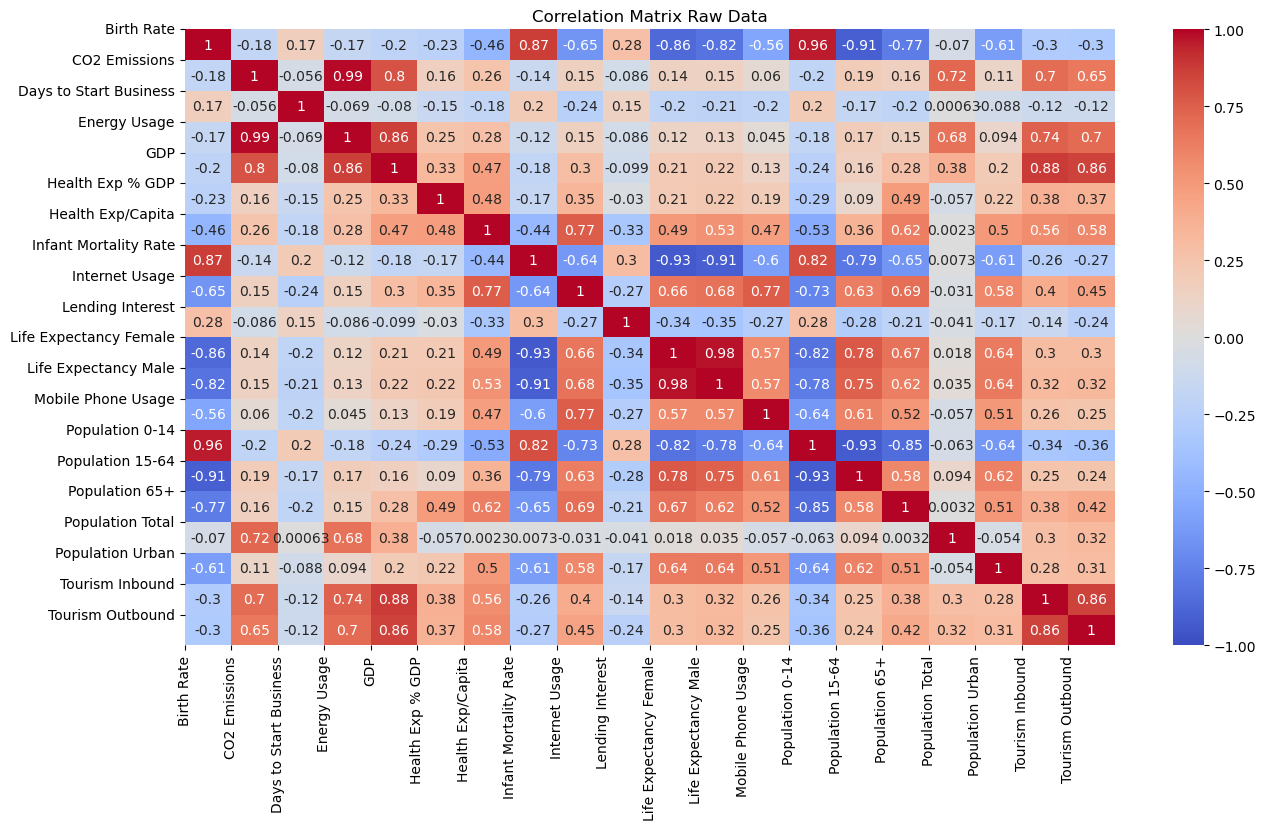

In [55]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set up the heatmap and figure size
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the x- and y-axis labels using the column names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Add a title and display the plot
plt.title('Correlation Matrix Raw Data')
plt.show()

In [56]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the highly correlated columns
highly_correlated = set()
for col in corr_matrix:
    correlated_cols = corr_matrix.index[corr_matrix[col] > 0.8]
    for c in correlated_cols:
        if c != col:
            highly_correlated.add((col, c))

# Print the result
print(f"The following columns are highly correlated:\n{highly_correlated}")

The following columns are highly correlated:
{('Tourism Outbound', 'Tourism Inbound'), ('CO2 Emissions', 'GDP'), ('GDP', 'CO2 Emissions'), ('Population 0-14', 'Birth Rate'), ('GDP', 'Tourism Inbound'), ('GDP', 'Tourism Outbound'), ('Energy Usage', 'GDP'), ('Tourism Inbound', 'GDP'), ('Life Expectancy Male', 'Life Expectancy Female'), ('Birth Rate', 'Infant Mortality Rate'), ('Energy Usage', 'CO2 Emissions'), ('GDP', 'Energy Usage'), ('Tourism Outbound', 'GDP'), ('CO2 Emissions', 'Energy Usage'), ('Tourism Inbound', 'Tourism Outbound'), ('Infant Mortality Rate', 'Population 0-14'), ('Birth Rate', 'Population 0-14'), ('Infant Mortality Rate', 'Birth Rate'), ('Life Expectancy Female', 'Life Expectancy Male'), ('Population 0-14', 'Infant Mortality Rate')}


In [57]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Days to Start Business,703,29.230769
Energy Usage,644,26.777547
Lending Interest,546,22.702703
CO2 Emissions,390,16.216216
Tourism Outbound,246,10.228690
Tourism Inbound,169,7.027027
Health Exp % GDP,54,2.245322
Health Exp/Capita,54,2.245322
Mobile Phone Usage,49,2.037422
Internet Usage,48,1.995842


In [58]:
LI = df.set_index('Country')[['Lending Interest']].isnull().groupby('Country').sum().loc[lambda x: x['Lending Interest'] == 13]

In [59]:
LI

,Lending Interest
Country,
Austria,13
Benin,13
Burkina Faso,13
Cambodia,13
Cote d'Ivoire,13
Cuba,13
Eritrea,13
Ghana,13
Guinea-Bissau,13


In [60]:
LI.value_counts()

Lending Interest
13                  24
dtype: int64

In [61]:
df[df['Country'] == 'Benin']

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2,0.043,1617.0,Benin,NaN,1983.0,2359122303,0.043,15,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
187,0.042,1738.0,Benin,NaN,2109.0,2499269391,0.047,16,0.088,0.0,NaN,57.0,54.0,0.0,0.453,0.518,0.029,7174911,0.387,86000000,48000000
372,0.042,2054.0,Benin,NaN,2262.0,2807657386,0.043,16,0.085,0.0,NaN,58.0,54.0,0.0,0.451,0.520,0.028,7414744,0.390,95000000,49000000
557,0.041,2321.0,Benin,32.0,2386.0,3557229702,0.046,21,0.082,0.0,NaN,58.0,55.0,0.0,0.449,0.522,0.028,7665681,0.393,108000000,53000000
742,0.041,2512.0,Benin,31.0,2491.0,4050869968,0.046,23,0.078,0.0,NaN,58.0,55.0,0.1,0.447,0.525,0.028,7922796,0.396,121000000,59000000
927,0.040,2398.0,Benin,31.0,2499.0,4358015993,0.047,25,0.075,0.0,NaN,59.0,56.0,0.1,0.445,0.527,0.028,8182362,0.400,108000000,58000000
1112,0.040,3876.0,Benin,31.0,2949.0,4705087452,0.048,26,0.072,0.0,NaN,59.0,56.0,0.1,0.443,0.529,0.028,8443671,0.403,122000000,71000000
1297,0.039,4499.0,Benin,31.0,3206.0,5506275948,0.045,29,0.069,0.0,NaN,59.0,57.0,0.2,0.441,0.531,0.028,8707490,0.407,206000000,107000000
1482,0.039,4492.0,Benin,31.0,3278.0,6633561835,0.042,31,0.066,0.0,NaN,60.0,57.0,0.4,0.439,0.533,0.029,8973293,0.411,236000000,102000000
1667,0.038,4756.0,Benin,31.0,3439.0,6585134688,0.044,32,0.064,0.0,NaN,60.0,57.0,0.5,0.436,0.535,0.029,9240783,0.415,131000000,88000000


### Inserting Lending Rates from Online sources

#### Benin

In [63]:
list = [0.08,0.047,0.048,0.05,0.050, 
        0.051,0.052,0.053,0.069,0.068,0.67,0.065,0.063] 
# from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Benin':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
    
        

#### Burkina Faso

In [64]:
list = [0.089,0.047,0.048,0.05,0.05,0.051,0.053,0.052,0.053,0.068,0.052,0.065,0.067] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Burkina Faso':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Eritrea

In [65]:
# The interest rate varies from 9-12% per annum
list = np.random.uniform(0.09,0.12, 13) 

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] == "Eritrea" :
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Ghana


In [66]:
#https://www.bog.gov.gh/economic-data/interest-rates/
list = [0.27,0.27,0.245,0.215,0.185,0.155,0.125,0.135,0.17,0.18,0.135,0.125,0.15]

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] == "Ghana" :
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Guinea Bissau

In [67]:
list = [0.104,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Guinea-Bissau':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Mali

In [68]:
list = [0.087,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Mali':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Niger

In [69]:
list = [0.108,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Niger':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Senegal

In [70]:
list = [0.07,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Senegal':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Togo

In [71]:
list = [0.088,0.047,0.048,0.05,0.05,0.051,0.053,0.05,0.053,0.053,0.052,0.053,0.051] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Togo':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Uganda


In [72]:
list = [0.229,0.227,0.191,0.189,0.206,0.196,0.187,0.191,0.205,0.21,0.202,0.218,0.262] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Uganda':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Zimbabwe


In [73]:
list = [0.116,0.097,0.095,0.085,0.071,0.069,0.071,0.162,0.33,0.455,
        np.nan, np.nan, np.nan] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Zimbabwe':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Afghanistan


In [74]:
list = [0.18,0.181,0.149,0.15,0.156,0.151,0.15,0.151,0.15,0.15,0.15,0.148,np.nan] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Afghanistan':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Kazakhstan

In [75]:
#https://www.focus-economics.com/country-indicator/kazakhstan/interest-rate
list = [0.24,0.24,0.24,0.08,0.085,0.09,0.10,0.12,0.115,0.08,0.08,0.825,0.07] 

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Kazakhstan':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Tunisia

In [77]:
list = [0.0575,0.0575,0.0575,0.05,0.05,0.05,0.0525,0.0525,0.0525,0.045,0.045,0.035,0.040] 
#https://www.focus-economics.com/country-indicator/tunisia/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Tunisia':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Austria

In [78]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/austria/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Austria':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Luxmebourg

In [79]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/luxembourg/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Luxembourg':
      
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Portugal

In [80]:
list = [np.nan, np.nan, 0.03,0.02,0.02,0.0225,0.035,0.04,0.025,0.01,0.01,0.01,0.0075] 
#https://www.focus-economics.com/country-indicator/portugal/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Portugal':
       
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Turkey

In [81]:
list = [0.80,0.55,0.45,0.25,0.15,0.10,0.15,0.15,0.15,0.05,0.05,0.05,0.05] 
#https://www.focus-economics.com/country-indicator/turkey/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Turkey':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Saudi arabia

In [82]:
list = [0.07,0.03,0.02,0.015,0.025,0.045,0.05,0.055,0.025,0.02,0.02,0.02,0.02] 
#https://www.focus-economics.com/country-indicator/saudi-arabia/interest-rate

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Saudi Arabia':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1

#### Cuba

In [83]:
list = [0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225,0.0225] 

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =='Cuba':
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Cote d'Ivoire

In [85]:
list = [np.nan,np.nan,np.nan,np.nan,np.nan,0.07,0.047,0.048,0.05,0.05,0.051,0.053,0.05] # from world bank site

j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Cote d'Ivoire":
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
      

#### Sudan


In [86]:
list = [np.nan,np.nan,np.nan, 0.17,0.18,0.11,0.11,0.12,0.12,0.12,0.12,0.10, 0.11]
#https://take-profit.org/en/statistics/interest-rate/sudan
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Sudan":
       
        df['Lending Interest'][i] = list[j]
        j = j + 1
        
        

#### Uzbekistan

In [87]:
list = [0.28, 0.24,0.30,0.24,0.20,0.16,0.16,0.14,0.14,0.14,0.14,0.12,0.12]
#Central bank of Uzbekistan  -- https://cbu.uz/en/monetary-policy/refinancing-rate/levels/
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Uzbekistan":
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

#### Turkmenistan


In [88]:
list = [np.nan,np.nan,np.nan,np.nan, np.nan,np.nan,np.nan, 0.019, 0.019, 0.020, 0.0125, 0.0125, 0.125]
# Asian development bank -- adb.org/statistics
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Turkmenistan":
        
        df['Lending Interest'][i] = list[j]
        j = j + 1
        


#### Cambodia

In [89]:
list = [0.279,0.267,0.219,0.204,0.173, np.nan,np.nan,np.nan,np.nan, np.nan,np.nan,np.nan,np.nan]
# https://tradingeconomics.com/cambodia/interest-rate
j = 0 
for i in range(0, len(df)):
    if df['Country'][i] =="Cambodia":
       
        df['Lending Interest'][i] = list[j]
        j = j + 1
        

In [90]:
# Column wise null values
total_null = df.isnull().sum().sort_values(ascending=False)  
percent_null = ((df.isnull().sum() / df.shape[0])*100 ).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total_null', 'Percent_null'])
missing_data.head(20) 

,Total_null,Percent_null
Days to Start Business,703,29.230769
Energy Usage,644,26.777547
CO2 Emissions,390,16.216216
Lending Interest,281,11.683992
Tourism Outbound,246,10.228690
Tourism Inbound,169,7.027027
Health Exp % GDP,54,2.245322
Health Exp/Capita,54,2.245322
Mobile Phone Usage,49,2.037422
Internet Usage,48,1.995842


In [91]:
df.groupby('Country')['GDP'].apply(lambda x: x.isnull().any()).sum() == 13

False

### Imputing Energy Usage with Simple Linear Regression

We lack online resources to insert accurate data of energy usage

we take predictor CO2 emission to predict missing values of Energy usage

In [93]:
df.corr()['Energy Usage'].sort_values(ascending=False)[0:3]

Energy Usage     1.000000
CO2 Emissions    0.988724
GDP              0.860967
Name: Energy Usage, dtype: float64

<AxesSubplot:xlabel='CO2 Emissions', ylabel='Energy Usage'>

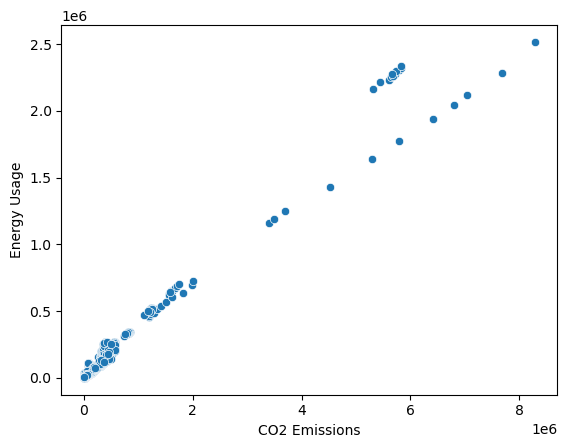

In [94]:
sns.scatterplot(df['CO2 Emissions'] , df['Energy Usage'])
#almost perfectly linear relation

Our approach involves addressing a discrepancy between the CO2 values in the train and test datasets. Specifically, the CO2 values in the train dataset are significantly larger than those in the test dataset. This discrepancy can lead to inconsistencies in model predictions, as the model is trained on large values and tested on small ones. To mitigate this issue, we slice the train dataset in a way that ensures that both the train and test datasets contain CO2 values within the same range.¶
For example, if the test data contains CO2 values in the hundreds, we will trim the train dataset to only include CO2 values in the hundreds and remove values in the thousands and lakhs.

In [97]:
df_eu = df[[ 'CO2 Emissions', 'Energy Usage']]   
df_eu.head() # only 2 columns 

,CO2 Emissions,Energy Usage
0,87931.0,26998.0
1,9542.0,7499.0
2,1617.0,1983.0
3,4276.0,1836.0
4,1041.0,NaN


In [98]:
df_eu = df[[ 'CO2 Emissions', 'Energy Usage']]   
df_eu.head() # only 2 columns 

,CO2 Emissions,Energy Usage
0,87931.0,26998.0
1,9542.0,7499.0
2,1617.0,1983.0
3,4276.0,1836.0
4,1041.0,NaN


 #### All non null values for y (energy usage) 

In [99]:
df_eu_train = df_eu[np.isfinite(df_eu['Energy Usage'])]
print('Shape after removing null values for energy usage:', df_eu_train.shape)

Shape after removing null values for energy usage: (1761, 2)


#### All non null values for x(CO2 Emissions)

In [100]:
df_eu_train.dropna(axis=0, inplace=True)
print('Shape after removing null values for CO2 Emissions:', df_eu_train.shape)

Shape after removing null values for CO2 Emissions: (1584, 2)


In [101]:
df_eu_train.head()

,CO2 Emissions,Energy Usage
0,87931.0,26998.0
1,9542.0,7499.0
2,1617.0,1983.0
3,4276.0,1836.0
6,3432.0,6310.0


In [102]:
df_eu_test = df_eu[df_eu['Energy Usage'].isna()]
print('Shape after keeping only null values of Energy Usage', df_eu_test.shape)

df_eu_test.dropna(subset=['CO2 Emissions'], inplace=True) 
print('Shape after removing null values of CO2 Emissions', df_eu_test.shape)  

Shape after keeping only null values of Energy Usage (644, 2)
Shape after removing null values of CO2 Emissions (431, 2)


In [103]:
df_eu_test.head()

,CO2 Emissions,Energy Usage
4,1041.0,NaN
5,301.0,NaN
7,268.0,NaN
8,176.0,NaN
9,84.0,NaN


#### Finding the Minimum and Maximum Range Between CO2 Emission 

In [104]:
df_eu_test['CO2 Emissions'].min() ,df_eu_test['CO2 Emissions'].max()

(18.0, 8236.0)

#### Finding out the Outliners in it CO2 Emission using Boxplot

<AxesSubplot:xlabel='CO2 Emissions'>

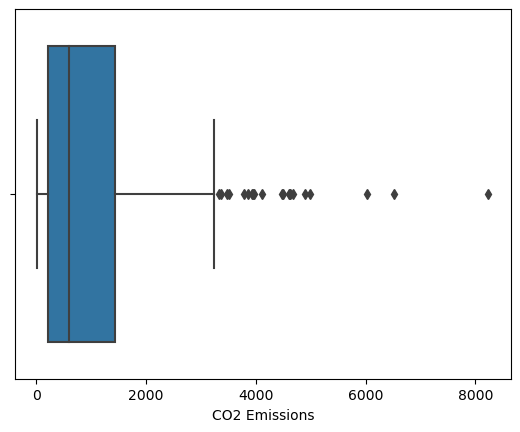

In [105]:
sns.boxplot(df_eu_test['CO2 Emissions'])

##### Removing Outliner's

In [106]:
Q1,Q3 = np.percentile(df_eu_test['CO2 Emissions'],[25,75])
IQR = Q3 - Q1
Upper_Q = Q3 + 1.5*IQR
Lower_Q = Q1 - 1.5*IQR
Price_outliners = df_eu_test['CO2 Emissions'][(df_eu_test['CO2 Emissions'] > Upper_Q) | (df_eu_test['CO2 Emissions'] < Lower_Q)]
Price_outliners.count()

21

From the Boxplot we can see that the outliners are above 3800 value but still there are other which are not widely seprated from each so gonna consider it as a group as above 5000 value we will remove it? Because the values are widely seperated.

In [107]:
df_eu_test[df_eu_test['CO2 Emissions']> 5000 ] 

,CO2 Emissions,Energy Usage
570,6018.0,NaN
1716,6524.0,NaN
1901,8236.0,NaN


In [108]:
df_eu_test.drop(df_eu_test[df_eu_test['CO2 Emissions']> 5000 ].index, inplace=True)

In [109]:
# now test data has range of
df_eu_test['CO2 Emissions'].min() ,df_eu_test['CO2 Emissions'].max()

(18.0, 4980.0)

Making some changes on our Train Datasets

In [110]:
#so we will trim our train data such that CO2 values are not beyond 5000
df_eu_train = df_eu_train[df_eu_train['CO2 Emissions'] < 5000] 

In [111]:
df_eu_train_x = df_eu_train[['CO2 Emissions']] 
df_eu_train_y = pd.DataFrame(df_eu_train['Energy Usage'] , columns=['Energy Usage']) 

#### No column Energy Usage for Y axis in df_eu_test_y because we will be predicting it. 


In [112]:
df_eu_test_x = pd.DataFrame(df_eu_test['CO2 Emissions'], columns=['CO2 Emissions']) 

In [113]:
df_eu_test_x

,CO2 Emissions
4,1041.0
5,301.0
7,268.0
8,176.0
9,84.0
...,...
2018,1701.0
2027,249.0
2028,403.0
2029,209.0
